In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath, header=0)

In [9]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [10]:
# update the Screen_Size_cm column such that all values are rounded 
# to nearest 2 decimal places by using numpy.round()
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [19]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Unnamed: 0
False    238
Name: Unnamed: 0, dtype: int64

Manufacturer
False    238
Name: Manufacturer, dtype: int64

Category
False    238
Name: Category, dtype: int64

Screen
False    238
Name: Screen, dtype: int64

GPU
False    238
Name: GPU, dtype: int64

OS
False    238
Name: OS, dtype: int64

CPU_core
False    238
Name: CPU_core, dtype: int64

Screen_Size_cm
False    234
True       4
Name: Screen_Size_cm, dtype: int64

CPU_frequency
False    238
Name: CPU_frequency, dtype: int64

RAM_GB
False    238
Name: RAM_GB, dtype: int64

Storage_GB_SSD
False    238
Name: Storage_GB_SSD, dtype: int64

Weight_kg
False    233
True       5
Name: Weight_kg, dtype: int64

Price
False    238
Name: Price, dtype: int64



### Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.

In [31]:
Weight_kg_mean = df[["Weight_kg"]].astype('float').mean(axis = 0)
df[["Weight_kg"]].replace(np.nan, Weight_kg_mean)

,Weight_kg
0,1.60
1,2.20
2,2.20
3,1.22
4,1.91
...,...
233,1.70
234,1.20
235,1.36
236,2.40


### Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.

In [34]:
df[["Screen_Size_cm"]].value_counts()

Screen_Size_cm
39.62             89
35.56             64
38.10             23
33.78             20
33.02             18
43.94              7
43.18              5
30.48              4
31.75              4
dtype: int64

In [36]:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()

df[["Screen_Size_cm"]].replace(np.nan, common_screen_size, inplace=True)

/var/folders/jm/547_dt494bxc278s4393lbh80000gn/T/ipykernel_24778/3224942152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["Screen_Size_cm"]].replace(np.nan, common_screen_size, inplace=True)


# Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.

In [43]:
df[["Weight_kg"]] = df[["Weight_kg"]].astype(float)
df[["Screen_Size_cm"]] = df[["Screen_Size_cm"]].astype(float)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.

In [41]:
df[["CPU_frequency"]] = df[["CPU_frequency"]]/df[["CPU_frequency"]].max()

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".

In [56]:
bins = np.linspace( df["Price"].min(), df["Price"].max(), 4)
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [68]:
df["Price-binned"] = pd.cut(df["Price"], bins, 
                              labels = ["Low", "Mdeium", "High"],
                              include_lowest=True)

Text(0.5, 1.0, 'Price bins')

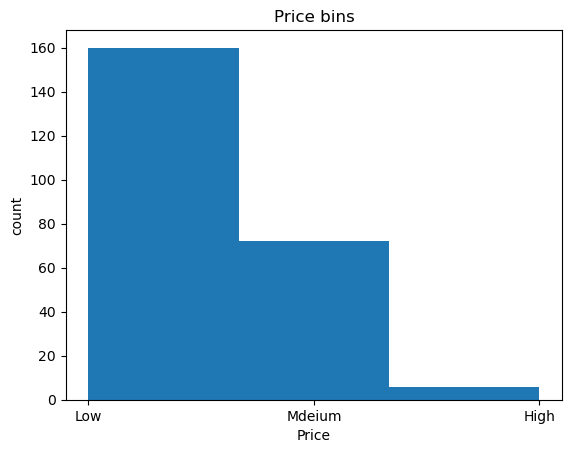

In [72]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["Price-binned"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Price")
plt.pyplot.ylabel("count")
plt.pyplot.title("Price bins")

## Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [76]:
screen_dummy = pd.get_dummies(df[["Screen"]])
screen_dummy

,Screen_Full HD,Screen_IPS Panel
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
233,0,1
234,1,0
235,0,1
236,1,0


In [79]:
df = pd.concat([df, screen_dummy], axis = 1)
df.drop("Screen", axis = 1, inplace = True)